Yes


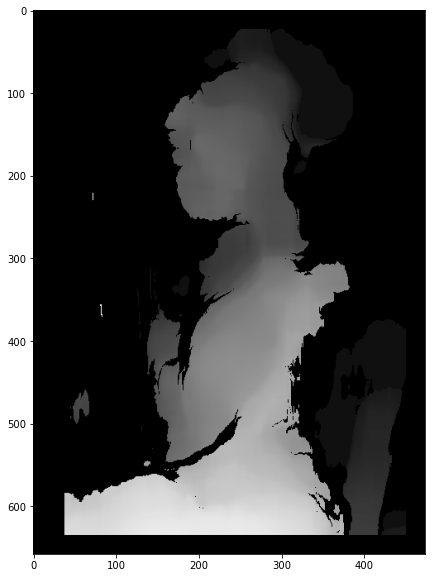

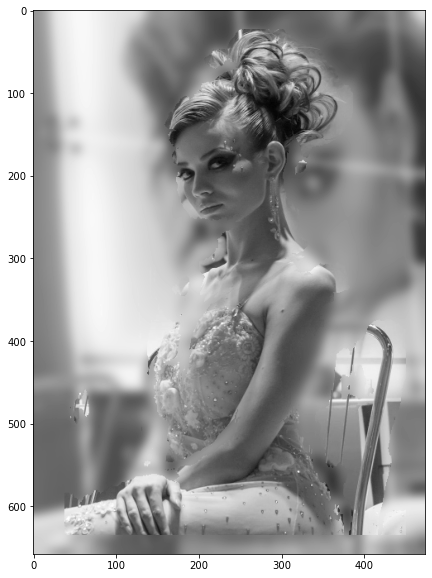

In [29]:
import numpy as np
import cv2
import sys
from mpl_toolkits import mplot3d
from matplotlib import pyplot as plt

def change(objects):
    pass

def getDisparityMap(imL, imR, numDisparities, blockSize):
    stereo = cv2.StereoBM_create(numDisparities=numDisparities, blockSize=blockSize)

    disparity = stereo.compute(imL, imR)
    disparity = disparity - disparity.min() + 1 # Add 1 so we don't get a zero depth, later
    disparity = disparity.astype(np.float32) / 16.0 # Map is fixed point int with 4 fractional bits

    return disparity # floating point image

def getDepth(disparity, k):
    d = 1/(disparity + (k/100))

    return d


if __name__ == '__main__':

    # Load left image
    filename = 'girlL.png'
    imgL = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    # imgL = cv2.Canny(imgL, 70, 150)
    #
    if imgL is None:
        print('\nError: failed to open {}.\n'.format(filename))
        sys.exit()


    # Load right image
    filename = 'girlR.png'
    imgR = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    # imgR = cv2.Canny(imgR, 70, 150)
    #
    if imgR is None:
        print('\nError: failed to open {}.\n'.format(filename))
        sys.exit()


    # Create a window to display the image in
    cv2.namedWindow('Depth', cv2.WINDOW_NORMAL)

    # # Get disparity map
    disparity = getDisparityMap(imgL, imgR, 16, 45)
    #
    # # Normalise for display
    disparityImg = np.interp(disparity, (disparity.min(), disparity.max()), (0.0, 1.0))

    # Show result
#     cv2.imshow('Disparity', disparityImg)
    cv2.createTrackbar('k_value','Depth',0, 100 , change)

#     depth = getDepth(disparity, 60)
#     print(np.unique(depth))
    
    
    # print(imgL[600,])
    # print('---------------------')
#     print(depth[600,])
#     print(depth.shape)
#     print(imgL.shape)
#     plt.figure(figsize=(10,10))
#     plt.imshow(disparityImg,'gray')
#     plt.figure(figsize=(10,10))
#     plt.imshow(depth,'gray')
    
    # Show 3D plot of the scene
    # plot(disparity)

    # Wait for spacebar press or escape before closing,
    # otherwise window will close without you seeing it
    while True:
        cv2.imshow('Depth',depth)
        key = cv2.waitKey(1)
        if key == ord(' ') or key == 27:
            break
        # Get trackbars
        k = cv2.getTrackbarPos('k_value','Depth')

        if k % 1 != 0:
        # if numd % 16 != 0 or bs % 2 ==0 :
            continue
        else:
            disparity = getDisparityMap(imgL, imgR, 16, 45)
            depth = getDepth (disparity, k)
            blur = cv2.GaussianBlur(imgL, (0,0), 6)
            if depth.shape==imgL.shape:
                print('Yes')
                for r in range(depth.shape[0]):
                    for c in range(depth.shape[1]):
                        if depth[r,c] < 1 :
                            depth[r,c]=imgL[r,c]
                        else:
                            depth[r,c]=blur[r,c]

    cv2.destroyAllWindows()

